In [9]:
    scores = []
    sentiment_labels = {"Positive": 0, "Negative": 0, "Neutral": 0}
    heatmap_data = []  #  for source-domain sentiment mapping

    for art in articles:
        score = analyze_sentiment(art.content)
        scores.append(score)

        # Count sentiment categories
        if score > 0:
            sentiment_labels["Positive"] += 1
        elif score < 0:
            sentiment_labels["Negative"] += 1
        else:
            sentiment_labels["Neutral"] += 1

        # Build heatmap source info using URL
        if art.url:
            source = art.url.split('/')[2]  # crude domain extraction
            heatmap_data.append({'source': source, 'sentiment': score})



Generating heatmap by news source...



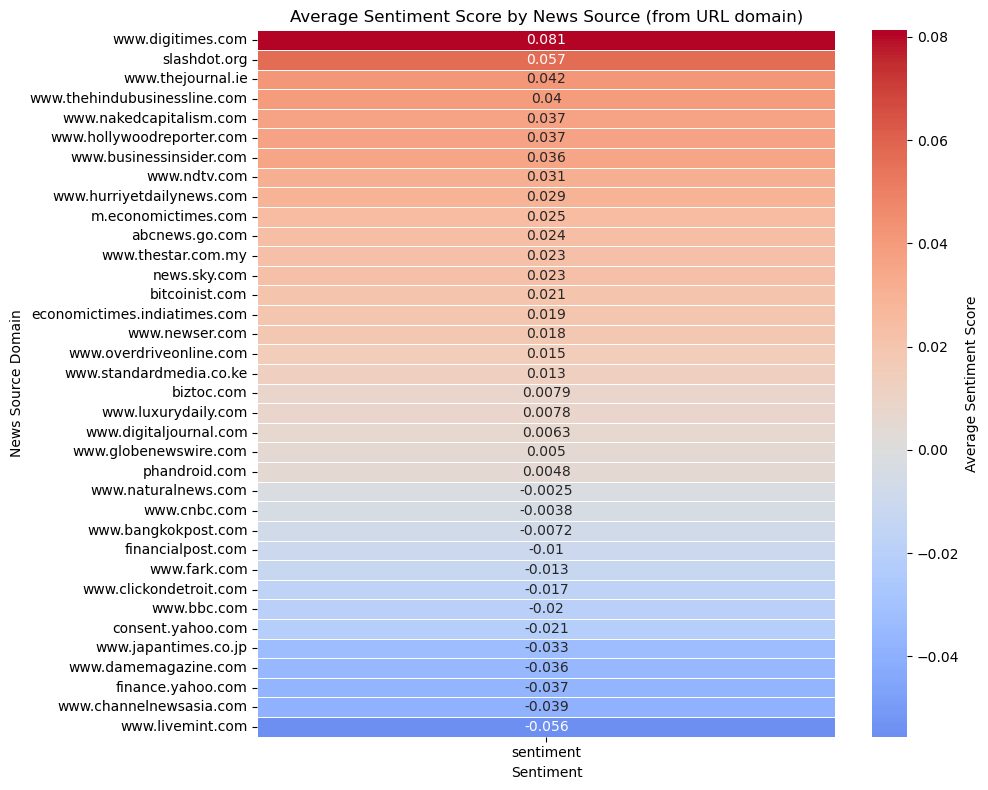

In [11]:
    # 📊 Heatmap of sentiment per source domain
    print("\nGenerating heatmap by news source...\n")

    import seaborn as sns
    import pandas as pd

    df = pd.DataFrame(heatmap_data)
    pivot = df.groupby('source')['sentiment'].mean().reset_index()
    pivot = pivot.pivot_table(index='source', values='sentiment')
    pivot = pivot.sort_values(by='sentiment', ascending=False)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        pivot,
        annot=True,
        cmap='coolwarm',
        center=0,
        linewidths=0.5,
        cbar_kws={'label': 'Average Sentiment Score'}
    )
    plt.title("Average Sentiment Score by News Source (from URL domain)")
    plt.ylabel("News Source Domain")
    plt.xlabel("Sentiment")
    plt.tight_layout()
    plt.show()
